# Pandas Basic <hr style="border:2.5px solid rgb(46, 40, 221)"></hr>

Data Analsyt: Arlee D. Tanaman <br>
Department: Electrical Engineering

In [116]:
%pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
%pip install pandas --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [119]:
gsw = {
    "Name":['Jimmy Butler','Stephen Curry','Draymond Green','Buddy Hield','Brandin Podzemski'],
    "Age":[35,37,35,32,22],
    "Sex":['M','M','M','M','M'],
    "Position":['PF','PG','C','SF','SG'],
}
gsw

{'Name': ['Jimmy Butler',
  'Stephen Curry',
  'Draymond Green',
  'Buddy Hield',
  'Brandin Podzemski'],
 'Age': [35, 37, 35, 32, 22],
 'Sex': ['M', 'M', 'M', 'M', 'M'],
 'Position': ['PF', 'PG', 'C', 'SF', 'SG']}

In [120]:
df = pd.DataFrame(gsw)
df


,Name,Age,Sex,Position
0,Jimmy Butler,35,M,PF
1,Stephen Curry,37,M,PG
2,Draymond Green,35,M,C
3,Buddy Hield,32,M,SF
4,Brandin Podzemski,22,M,SG


In [121]:
df ['Age']

0    35
1    37
2    35
3    32
4    22
Name: Age, dtype: int64

In [122]:
df['Age'].sum()

np.int64(161)

In [123]:
df['Age'].mean()

np.float64(32.2)

# Correlation

In [124]:
measurements = {"current":[2, 3.5, 1.8, 4.2 , 2.7], "power":[100, 200, 90, 210, 110]}

measurements


{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [125]:
device = pd.DataFrame(measurements)
device

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [126]:
device.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [127]:
device.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [128]:
device.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter Plot

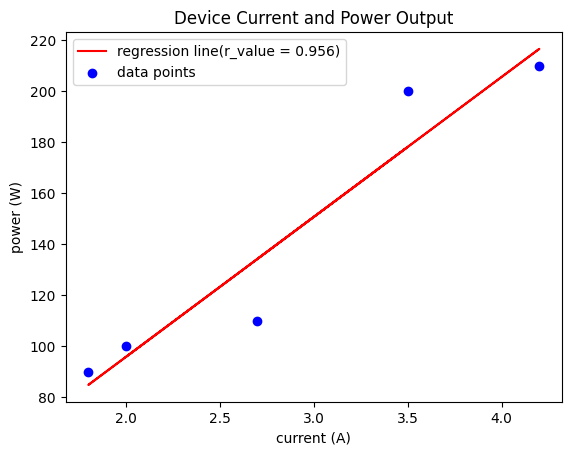

In [169]:
x = device["current"]
y = device["power"]

m, b, r_value, p_value, std_err = stats.linregress(x,y)
line = m*x + b
plt.plot(x,line,
         color='red',label=f'regression line(r_value = {r_value:.3f})')

plt.scatter(x,y,
            color='blue',
            label='data points')
plt.title('Device Current and Power Output')
plt.ylabel('power (W)')
plt.xlabel('current (A)')
plt.legend()
plt.show()

# Resistance Test

In [159]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [150]:

resistance['Jaguar'].mean()

np.float64(9.399999999999999)

In [160]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [151]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [152]:
resistance['Panther'].fillna(pan_mean)

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [153]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

In [154]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


# Bar Graph

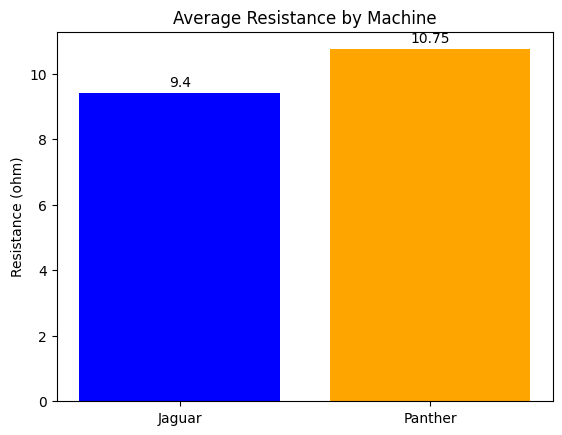

In [163]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean, pan_mean], color=['blue','orange'])
plt.title('Average Resistance by Machine')

plt.ylabel('Resistance (ohm)')

plt.bar_label(bars, padding=3)
plt.show()